In [1]:
%matplotlib inline
from graph import *
from kernel import *
from svm import SVM
import seaborn as sns
import matplotlib.pyplot as plt
db = Database()

In [2]:
#db_lab, db_nolab = db.gen_database_test(10, 10, 3, 4)
ker=Kernel(0.05)



In [3]:
#db.loaded = True
#db.export_db(db_nolab,"no_sing.dat")
db_nolab = db.import_db("no_sing.dat")

In [4]:
%%time
s = SVM(db_lab, 0.7, 0.9, kernel="inv_kernel")
s.learn()
s2 = SVM(db_nolab, 0.7, 0.9, kernel="inv_kernel")
s2.learn()
print("Lab score",s.cross_val_score(3)," & nolab score",s2.cross_val_score(3))

NameError: name 'db_lab' is not defined

In [4]:
raw = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.raw_kernel)
inv = ker.build_gram_matrix(db_nolab[:,0],kernel=ker.inv_kernel)
diff = ker.scale_and_compare(raw,ker)
#donne ecart type une fois matrice normalisées
print(diff)
sns.heatmap(inv/np.max(inv))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 100 is different from 1)

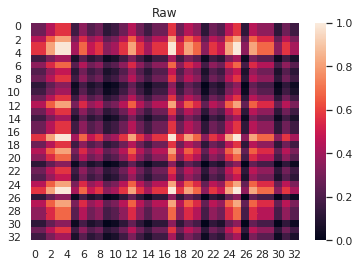

In [4]:
plt.clf()
plt.title("Raw")
sns.heatmap(ker.build_gram_matrix(db_nolab[:,0],kernel=ker.raw_kernel))

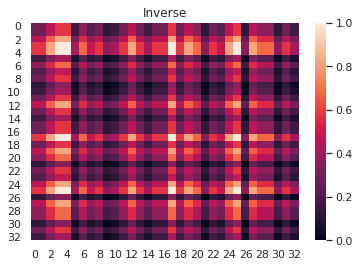

In [5]:
plt.clf()
plt.title("Inverse")
sns.heatmap(ker.build_gram_matrix(db_nolab[:,0],kernel=ker.inv_kernel))

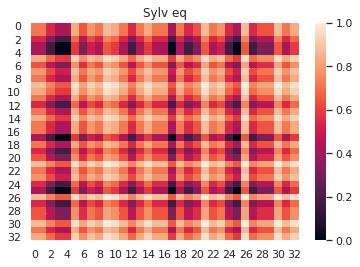

In [4]:
plt.clf()
plt.title("Sylv eq")
sns.heatmap(ker.build_gram_matrix(db_nolab[:,0],kernel=ker.sylv_eq_kernel))

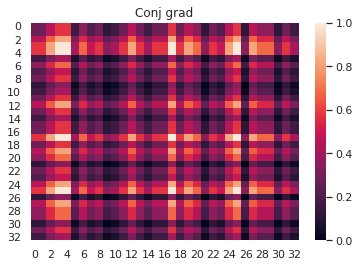

In [7]:
plt.clf()
plt.title("Conj grad")
sns.heatmap(ker.build_gram_matrix(db_nolab[:,0],kernel=ker.conj_grad_kernel))

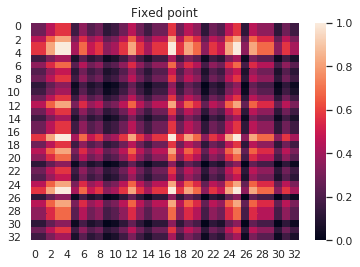

In [8]:
plt.clf()
plt.title("Fixed point")
sns.heatmap(ker.build_gram_matrix(db_nolab[:,0],kernel=ker.fixed_point_kernel))

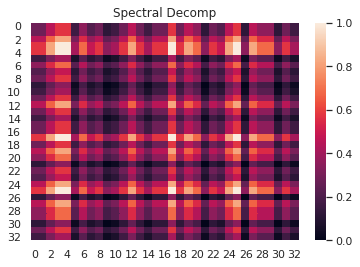

In [9]:
plt.clf()
plt.title("Spectral Decomp")
sns.heatmap(ker.build_gram_matrix(db_nolab[:,0],kernel=ker.spec_decomp_kernel))

In [ ]:
%%time
db = Database()
d = []
N = 30
for _ in range(N):
    db2 = db.gen_database_test(9, 5, 5, 3)
    s = SVM(db2, 0.7, 0.9, kernel="inv_kernel")
    d.append(s.cross_val_score(5))
print("Mean acc = ",sum([x["accuracy"] for x in d])/N)
print("Mean time = ",sum([x["time"] for x in d])/N)
print("Mean std = ",sum([x["stddev"] for x in d])/N)
#rajouter labels
# somme de k = Wx.shape ou 10xWx.shape ne change rien
#normalisé bcp plus rapide (pas toujour)
# certains ont un meilleur score avec d'autres que eux mêmes 
#affichage des graphes et dérouler l'algo à la main pour les carrés noir
#faire avec labels 2~5 et essayer d'avoir des distributions de labels pas trop différentes entre les toplogies

In [ ]:
dbA.shape

## All graphs
Star

In [ ]:
G = db.gen_graph("star",5,3)
pos=nx.spring_layout(G)
nx.draw(G,pos)
plt.figure()
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G.edges(data=True)})

G2=db.alter_graph_struct(G,"star",2)
plt.figure()
pos=nx.spring_layout(G2)
nx.draw(G2,pos)
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G2.edges(data=True)})

G3=db.alter_graph_labels(G,2)
print(G3)
plt.figure()
pos=nx.spring_layout(G3)
nx.draw(G3,pos)
nx.draw_networkx_edge_labels(G3,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G3.edges(data=True)})

Ring

In [ ]:
G = db.gen_graph("ring",5,3)
pos=nx.spring_layout(G)
nx.draw(G,pos)
plt.figure()
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G.edges(data=True)})

G2=db.alter_graph_struct(G,"ring",2)
plt.figure()
pos=nx.spring_layout(G2)
nx.draw(G2,pos)
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G2.edges(data=True)})

G3=db.alter_graph_labels(G,2)
print(G3)
plt.figure()
pos=nx.spring_layout(G3)
nx.draw(G3,pos)
nx.draw_networkx_edge_labels(G3,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G3.edges(data=True)})

Tree

In [ ]:
G = db.gen_graph("tree",9,3)
pos=nx.spring_layout(G)
nx.draw(G,pos)
plt.figure()
nx.draw(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G.edges(data=True)})

G2=db.alter_graph_struct(G,"tree",2)
plt.figure()
pos=nx.spring_layout(G2)
nx.draw(G2,pos)
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G2.edges(data=True)})

G3=db.alter_graph_labels(G,2)
print(G3)
plt.figure()
pos=nx.spring_layout(G3)
nx.draw(G3,pos)
nx.draw_networkx_edge_labels(G3,pos,edge_labels={(u,v):e["label"] for (u,v,e) in G3.edges(data=True)})

# Points fixes : faire varier lambda et montrer différence temps de convergence & verifier si lambda plus haut donne de meilleur accuracy

In [ ]:
xs = []
scores = []
times = []
N = 500
for x in range(N):
    try : 
        s = SVM(db=db_lab, ratio_split=0.5, lbd=x/N, kernel="fixed_point_kernel")
        t=s.learn()
        scores.append(s.score())
        xs.append(x/N)
        times.append(t)
    except:
        break
print(scores)
print(times)
plt.figure()
plt.plot(xs,scores,label="Accuracy")
plt.plot(xs,times,label="Computation time")
plt.legend()

# Computation time for different kernels VARIATION ON LAMBDA

In [ ]:
xs = []
t_raw = []
t_inv = []
t_syl = []
t_fix = []
t_conj = []
t_spec = []
N = 10
for x in range(1,N):
    xs.append(x/N)
    #raw
    s = SVM(db=db_lab, ratio_split=0.7, lbd=x/N, kernel="raw_kernel")
    t=s.learn()
    t_raw.append(t)
    #inv
    s = SVM(db=db_lab, ratio_split=0.7, lbd=x/N, kernel="inv_kernel")
    t=s.learn()
    t_inv.append(t)
    #syl
    s = SVM(db=db_lab, ratio_split=0.7, lbd=x/N, kernel="sylv_eq_kernel")
    #t=s.learn()
    t_syl.append(0)
    #conj
    s = SVM(db=db_lab, ratio_split=0.7, lbd=x/N, kernel="conj_grad_kernel")
    t=s.learn()
    t_conj.append(t)
    #conj
    s = SVM(db=db_lab, ratio_split=0.7, lbd=x/N, kernel="spec_decomp_kernel")
    t=s.learn()
    t_spec.append(t)
    try : 
        s = SVM(db=db_lab, ratio_split=0.7, lbd=x/N, kernel="fixed_point_kernel")
        t=s.learn()
        t_fix.append(t)
    except:
        pass

In [ ]:
plt.figure()
plt.yscale("log") 
plt.plot(xs,t_raw,label="Raw Kernel")
plt.plot(xs,t_inv,label="Inverse Kernel")
plt.plot(xs,t_syl,label="Sylvester Equation Kernel")
plt.plot(xs[0:len(t_fix)],t_fix,label="Fixed Point Kernel")
plt.plot(xs,t_conj,label="Conjugate Gradient Kernel")
plt.plot(xs,t_spec,label="Spectral Decomposition Kernel")
plt.legend()

# Accuracy for different kernels VARIATION ON LAMBDA

In [ ]:
xs = []
t_raw = []
t_inv = []
t_syl = []
t_fix = []
t_conj = []
t_spec = []
N = 10
for x in range(1,N):
    xs.append(x/N)
    #raw
    s = SVM(db=db_lab, ratio_split=0.7, lbd=x/N, kernel="raw_kernel")
    t=s.learn()
    t_raw.append(s.score())
    #inv
    s = SVM(db=db_lab, ratio_split=0.7, lbd=x/N, kernel="inv_kernel")
    t=s.learn()
    t_inv.append(s.score())
    #syl
    s = SVM(db=db_lab, ratio_split=0.7, lbd=x/N, kernel="sylv_eq_kernel")
    #t=s.learn()
    t_syl.append(0)
    #conj
    s = SVM(db=db_lab, ratio_split=0.7, lbd=x/N, kernel="conj_grad_kernel")
    t=s.learn()
    t_conj.append(s.score())
    #conj
    s = SVM(db=db_lab, ratio_split=0.7, lbd=x/N, kernel="spec_decomp_kernel")
    #t=s.learn()
    t_spec.append(0)
    try : 
        s = SVM(db=db_lab, ratio_split=0.7, lbd=x/N, kernel="fixed_point_kernel")
        t=s.learn()
        t_fix.append(s.score())
    except:
        pass

In [ ]:
plt.figure()
plt.plot(xs,t_raw,label="Raw Kernel")
plt.plot(xs,t_inv,label="Inverse Kernel")
plt.plot(xs,t_syl,label="Sylvester Equation Kernel")
plt.plot(xs[0:len(t_fix)],t_fix,label="Fixed Point Kernel")
plt.plot(xs,t_conj,label="Conjugate Gradient Kernel")
plt.plot(xs,t_spec,label="Spectral Decomposition Kernel")
plt.legend()

# Computation time for different kernels VARIATION ON NB OF GRAPHS

# verifier si approx ameliore ou empire accuracy et regarder temps calcul